In [113]:
import numpy as np
import matplotlib.pyplot as plt

In [95]:
examp1 = np.array([
    [1,1,1,1,1],
[1,9,9,9,1],
[1,9,1,9,1],
[1,9,9,9,1],
[1,1,1,1,1],
])

In [107]:
examp2 = np.array([
    [5,4,8,3,1,4,3,2,2,3],
    [2,7,4,5,8,5,4,7,1,1],
    [5,2,6,4,5,5,6,1,7,3],
    [6,1,4,1,3,3,6,1,4,6],
    [6,3,5,7,3,8,5,4,7,8],
    [4,1,6,7,5,2,4,6,4,5],
    [2,1,7,6,8,4,1,7,2,1],
    [6,8,8,2,8,8,1,1,3,4],
    [4,8,4,6,8,4,8,5,5,4],
    [5,2,8,3,7,5,1,5,2,6]
])

In [121]:
real_input = np.array([
    [8,2,7,1,6,5,3,8,3,6],
    [7,5,6,7,6,2,6,7,7,5],
    [2,3,1,5,7,1,3,3,1,6],
    [6,5,4,2,6,5,5,3,1,5],
    [2,4,5,3,6,3,7,3,3,3],
    [1,2,4,7,2,6,4,3,2,8],
    [2,3,2,5,1,4,6,6,1,4],
    [2,1,1,5,8,4,3,1,7,1],
    [6,1,8,2,3,7,6,2,8,2],
    [2,3,8,4,7,3,8,6,7,5]
])

In [109]:
def handle_step(octos):
    
    rows, cols = np.where(octos > 9)
    
    # check return
    if len(rows) == 0:
        return octos
    
    max_len = octos.shape[0]
    
    for row, col in zip(rows, cols):
        # register exploded
        exploded_.append((row, col))
        
        min_y = max(row-1, 0)
        max_y = min(row+2, max_len)
        min_x = max(col-1, 0)
        max_x = min(col+2, max_len)
        
        # print(f'{row, col}:{min_y, max_y, min_x, max_x}')
        
        octos[min_y: max_y, min_x:max_x] += 1
        
    # set already exploded to 0
    for row, col in exploded_:
        octos[row, col] = 0
    
    return handle_step(octos)

In [132]:
%%time

rsample = real_input.copy()

total_flashes = 0

for step in range(268):
    rsample += 1
    
    exploded_ = []
    
    aftermath = handle_step(rsample)
    
    total_flashes += len(exploded_)
    
    if len(exploded_) == 100:
        print(step)

267
CPU times: user 22.6 ms, sys: 2.08 ms, total: 24.6 ms
Wall time: 23.9 ms


In [123]:
total_flashes

1562

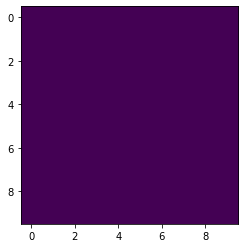

In [133]:
plt.imshow(rsample)

In [126]:
rsample.shape

(10, 10)